In [51]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss, roc_auc_score, roc_curve

In [26]:
df = pd.read_csv("HypertensionRisk.csv")

In [27]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


In [29]:
df=df.dropna()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3751 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           3751 non-null   int64  
 1   age            3751 non-null   int64  
 2   currentSmoker  3751 non-null   int64  
 3   cigsPerDay     3751 non-null   float64
 4   BPMeds         3751 non-null   float64
 5   diabetes       3751 non-null   int64  
 6   totChol        3751 non-null   float64
 7   sysBP          3751 non-null   float64
 8   diaBP          3751 non-null   float64
 9   BMI            3751 non-null   float64
 10  heartRate      3751 non-null   float64
 11  glucose        3751 non-null   float64
 12  Risk           3751 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 410.3 KB


In [36]:
y=df["Risk"]
x=df.drop("Risk", axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,train_size=0.70)

In [41]:
dt = DecisionTreeClassifier()
model1= dt.fit(x_train,y_train)
model1.score(x_test,y_test)

0.8579040852575488

In [44]:
predictions = model1.predict(x_test)
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.8579040852575488

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       780
           1       0.76      0.78      0.77       346

    accuracy                           0.86      1126
   macro avg       0.83      0.84      0.83      1126
weighted avg       0.86      0.86      0.86      1126



In [66]:
rf = RandomForestClassifier(n_estimators=340,min_samples_split=200,min_samples_leaf=5,max_features=7,max_depth=8,criterion='gini',n_jobs=-1)
model2= rf.fit(x_train,y_train)
model2.score(x_test,y_test)

0.9085257548845471

In [67]:
predictions = model2.predict(x_test)
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9085257548845471

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       780
           1       0.80      0.94      0.86       346

    accuracy                           0.91      1126
   macro avg       0.88      0.92      0.90      1126
weighted avg       0.92      0.91      0.91      1126



In [68]:
train_y_hat=rf.predict_proba(x_train)
naive_train_log_loss=log_loss(y_train, train_y_hat[:,1])
naive_train_roc_auc=roc_auc_score(y_train, train_y_hat[:,1])
print('The log loss of our model on the training set is : ' +str(round(naive_train_log_loss, 4)))
print('The ROC AUC of our model on the training set is : ' +str(round(naive_train_roc_auc, 3)))

The log loss of our model on the training set is : 0.2336
The ROC AUC of our model on the training set is : 0.963


In [69]:
test_y_hat=rf.predict_proba(x_test)
naive_test_log_loss=log_loss(y_test, test_y_hat[:,1])
naive_test_roc_auc=roc_auc_score(y_test, test_y_hat[:,1])
print('The log loss of our model on the test set is : ' +str(round(naive_test_log_loss, 4)))
print('The ROC AUC of our model on the test set is : ' +str(round(naive_test_roc_auc, 3)))

The log loss of our model on the test set is : 0.24
The ROC AUC of our model on the test set is : 0.954


In [70]:
train_fpr, train_tpr, train_thresholds = roc_curve(y_true=y_train, y_score=train_y_hat[:,1])
test_fpr, test_tpr, test_thresholds = roc_curve(y_true=y_test, y_score=test_y_hat[:,1])

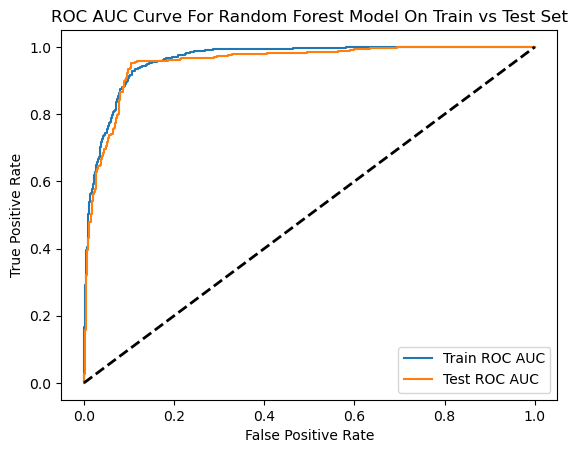

In [71]:
plt.plot(train_fpr, train_tpr, label='Train ROC AUC')
plt.plot(test_fpr, test_tpr, label='Test ROC AUC')
plt.plot([0, 1], [0, 1], color = 'black', linewidth = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC AUC Curve For Random Forest Model On Train vs Test Set')
plt.show()